In [1]:
# Topic Modeling 
# 맥락과 관련된 단어들을 이용하여 주제를 찾아내는 알고리즘..

In [2]:
! pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

In [70]:
tokenizer = RegexpTokenizer('[\w]+')

In [71]:
stop_words = stopwords.words('english')

In [72]:
p_stemmer = PorterStemmer()  # 어근 복원 : runs, running, ran => run, cars => car

In [73]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [74]:
# topic - keyword를 기준으로 keywords의 빈도(중요도)를 계산해서 문서의 유사도


# 1. health
# 2. food
# 3. bigdata
# 4. drive
# 5. data

In [75]:
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]

In [76]:
texts = []

In [77]:
for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmer_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmer_tokens)

In [78]:
texts

[['brocolli',
  'good',
  'eat',
  'brother',
  'like',
  'eat',
  'good',
  'brocolli',
  'mother'],
 ['mother',
  'spend',
  'lot',
  'time',
  'drive',
  'brother',
  'around',
  'basebal',
  'practic'],
 ['health',
  'expert',
  'suggest',
  'drive',
  'may',
  'caus',
  'increas',
  'tension',
  'blood',
  'pressur'],
 ['often',
  'feel',
  'pressur',
  'perform',
  'well',
  'school',
  'mother',
  'never',
  'seem',
  'drive',
  'brother',
  'better'],
 ['health', 'profession', 'say', 'brocolli', 'good', 'health'],
 ['big',
  'data',
  'term',
  'use',
  'refer',
  'data',
  'set',
  'larg',
  'complex',
  'tradit',
  'data',
  'process',
  'applic',
  'softwar',
  'adequ',
  'deal'],
 ['data',
  'mani',
  'case',
  'offer',
  'greater',
  'statist',
  'power',
  'data',
  'higher',
  'complex',
  'may',
  'lead',
  'higher',
  'fals',
  'discoveri',
  'rate'],
 ['big',
  'data',
  'origin',
  'associ',
  'three',
  'key',
  'concept',
  'volum',
  'varieti',
  'veloc'],
 ['2016

In [79]:
dictionary = corpora.Dictionary(texts) # Dictionary : token에 index를 붙여서 사전을

In [80]:
for w in dictionary.items():
    print(w)

(0, 'brocolli')
(1, 'brother')
(2, 'eat')
(3, 'good')
(4, 'like')
(5, 'mother')
(6, 'around')
(7, 'basebal')
(8, 'drive')
(9, 'lot')
(10, 'practic')
(11, 'spend')
(12, 'time')
(13, 'blood')
(14, 'caus')
(15, 'expert')
(16, 'health')
(17, 'increas')
(18, 'may')
(19, 'pressur')
(20, 'suggest')
(21, 'tension')
(22, 'better')
(23, 'feel')
(24, 'never')
(25, 'often')
(26, 'perform')
(27, 'school')
(28, 'seem')
(29, 'well')
(30, 'profession')
(31, 'say')
(32, 'adequ')
(33, 'applic')
(34, 'big')
(35, 'complex')
(36, 'data')
(37, 'deal')
(38, 'larg')
(39, 'process')
(40, 'refer')
(41, 'set')
(42, 'softwar')
(43, 'term')
(44, 'tradit')
(45, 'use')
(46, 'case')
(47, 'discoveri')
(48, 'fals')
(49, 'greater')
(50, 'higher')
(51, 'lead')
(52, 'mani')
(53, 'offer')
(54, 'power')
(55, 'rate')
(56, 'statist')
(57, 'associ')
(58, 'concept')
(59, 'key')
(60, 'origin')
(61, 'three')
(62, 'varieti')
(63, 'veloc')
(64, 'volum')
(65, '2016')
(66, 'analyt')
(67, 'asset')
(68, 'character')
(69, 'definit')
(70

In [81]:
print(texts[0])

['brocolli', 'good', 'eat', 'brother', 'like', 'eat', 'good', 'brocolli', 'mother']


In [82]:
dictionary.doc2bow(texts[0]) # token의 빈도를 tuple

[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)]

In [83]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (5, 1),
  (8, 1),
  (19, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (3, 1), (16, 2), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(18, 1),
  (35, 1),
  (36, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(34, 1),
  (36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(34, 1),
  (36, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),

In [34]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary)

In [35]:
ldamodel.print_topics(num_words = 7) # topic별 중요 token

[(0,
  '0.048*"health" + 0.038*"data" + 0.027*"may" + 0.025*"big" + 0.025*"veloc" + 0.025*"varieti" + 0.024*"volum"'),
 (1,
  '0.051*"data" + 0.028*"mother" + 0.028*"drive" + 0.027*"brother" + 0.026*"process" + 0.020*"inform" + 0.019*"pressur"'),
 (2,
  '0.046*"data" + 0.037*"good" + 0.036*"eat" + 0.036*"brocolli" + 0.028*"brother" + 0.026*"mother" + 0.021*"like"')]

In [36]:
ldamodel.get_document_topics(corpus)

In [37]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.034419607), (1, 0.034617122), (2, 0.9309633)]

In [38]:
ldamodel.get_document_topics(corpus)[2]

[(0, 0.93755853), (1, 0.031755567), (2, 0.030685876)]

In [39]:
for d in ldamodel.get_document_topics(corpus):
    print(d)

[(0, 0.034425493), (1, 0.034627516), (2, 0.93094695)]
[(0, 0.034124743), (1, 0.92643017), (2, 0.039445087)]
[(0, 0.9375582), (1, 0.031755958), (2, 0.030685872)]
[(0, 0.02631517), (1, 0.94717824), (2, 0.026506547)]
[(0, 0.8963441), (1, 0.047933258), (2, 0.055722587)]
[(0, 0.020713067), (1, 0.40159473), (2, 0.5776922)]
[(0, 0.9056244), (1, 0.07266392), (2, 0.021711754)]
[(0, 0.9366661), (1, 0.031353854), (2, 0.031980053)]
[(0, 0.019263204), (1, 0.016655177), (2, 0.96408165)]
[(0, 0.037905037), (1, 0.92357504), (2, 0.038519923)]


In [40]:
from gensim.corpora import Dictionary
text1 = [['man', 'female', 'man', 'human', 'man'], ['woman', 'boy', 'human', 'man', 'woman']]

dictionary = Dictionary(text1)
for i in dictionary.items():
    print(i)

(0, 'female')
(1, 'human')
(2, 'man')
(3, 'boy')
(4, 'woman')


In [41]:
[dictionary.doc2bow(text) for text in text1]

[[(0, 1), (1, 1), (2, 3)], [(1, 1), (2, 1), (3, 1), (4, 2)]]

In [42]:
dictionary.doc2bow(['man', 'woman', 'boy', 'female', 'man', 'woman', 'man'])

[(0, 1), (2, 3), (3, 1), (4, 2)]

In [43]:
dictionary.doc2idx(['man', 'woman', 'boy', 'female', 'man', 'woman', 'man'])

[2, 4, 3, 0, 2, 4, 2]

In [44]:
# LDA Topic modeling : perpiexity, coherence

# perplexity(훈련)
# 문헌 네 주제 출현확률과 주제 내 용어출현 활율

In [45]:
from gensim.models import CoherenceModel

print(ldamodel.log_perplexity(corpus))

-5.18302216200993


'human'

In [69]:
for d in dictionary.items():
    print(d)

(0, 'female')
(1, 'human')
(2, 'man')
(3, 'boy')
(4, 'woman')


In [91]:
coherence_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    print(ldamodel)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, \
                                                 dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

LdaModel(num_terms=85, num_topics=2, decay=0.5, chunksize=2000)
LdaModel(num_terms=85, num_topics=3, decay=0.5, chunksize=2000)
LdaModel(num_terms=85, num_topics=4, decay=0.5, chunksize=2000)
LdaModel(num_terms=85, num_topics=5, decay=0.5, chunksize=2000)
LdaModel(num_terms=85, num_topics=6, decay=0.5, chunksize=2000)
LdaModel(num_terms=85, num_topics=7, decay=0.5, chunksize=2000)
LdaModel(num_terms=85, num_topics=8, decay=0.5, chunksize=2000)
LdaModel(num_terms=85, num_topics=9, decay=0.5, chunksize=2000)


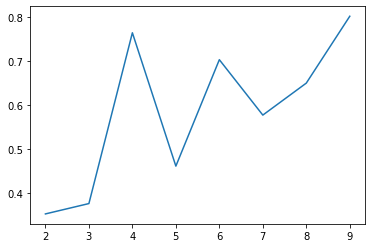

In [92]:
plt.plot(range(2, 10), coherence_values)

In [94]:
# mecab 한글 네이버 댓글 감성분석..
# 한글 감성어 사전 이용 네이버 댓글 감성분석..

In [98]:
import urllib

In [102]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="data_files/ratings_total.txt")

('data_files/ratings_total.txt', <http.client.HTTPMessage at 0x1c4db9a9f88>)

In [103]:
total_data = pd.read_table('data_files/ratings_total.txt', names=['ratings', 'reviews'])
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [105]:
total_data['reviews'].values

array(['배공빠르고 굿', '택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고',
       '아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.',
       ..., '로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요', '넘이쁘고 쎄련되보이네요~',
       '아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다'], dtype=object)